In [1]:
using PyPlot,JLD2,CALCEPH

In [4]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")

corner_planet (generic function with 1 method)

In [66]:
p_115=jldopen("FITS/p3_fit10.0s15.0yrs.jld2");p_mc115 = jldopen("MCMC/p3_mcmc10.0s15.0yrs.jld2");

In [69]:
# p_31=jldopen("FITS/p3_fit30.0s10.0yrs.jld2");p_mc31 = jldopen("MCMC/p3_mcmc30.0s10.0yrs.jld2");
p_315=jldopen("FITS/p3_fit30.0s15.0yrs.jld2");p_mc315 = jldopen("MCMC/p3_mcmc30.0s15.0yrs.jld2");
# p_32=jldopen("FITS/p3_fit30.0s20.0yrs.jld2");p_mc32 = jldopen("MCMC/p3_mcmc30.0s20.0yrs.jld2");
# p_33=jldopen("FITS/p3_fit30.0s30.0yrs.jld2");p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2");
# p_34=jldopen("FITS/p3_fit30.0s40.0yrs.jld2");p_mc34 = jldopen("MCMC/p3_mcmc30.0s40.0yrs.jld2");

Simulated with σ= 30 seconds


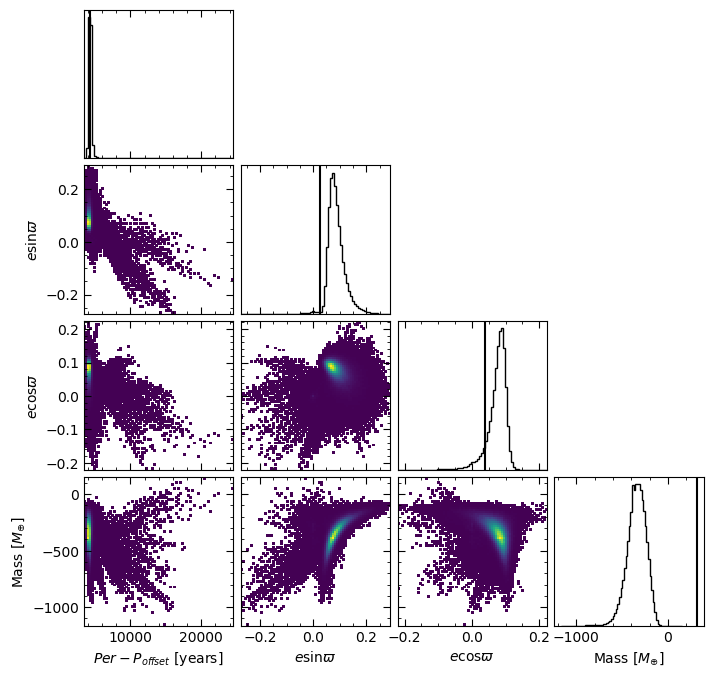

P-off4332.82012875
0.04010139295881334<-ecos & esin->0.026379504975697257


In [70]:
corner_planet(p_mc315,30,75,"jup")

Simulated with σ= 30 seconds


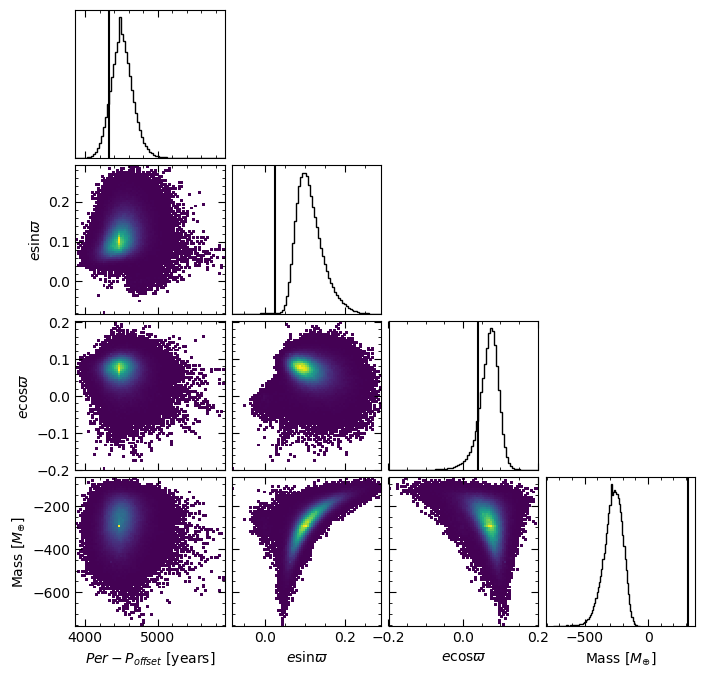

P-off4332.82012875
0.04010139295881334<-ecos & esin->0.026379504975697257


In [71]:
corner_planet(p_mc32,30,75,"jup")

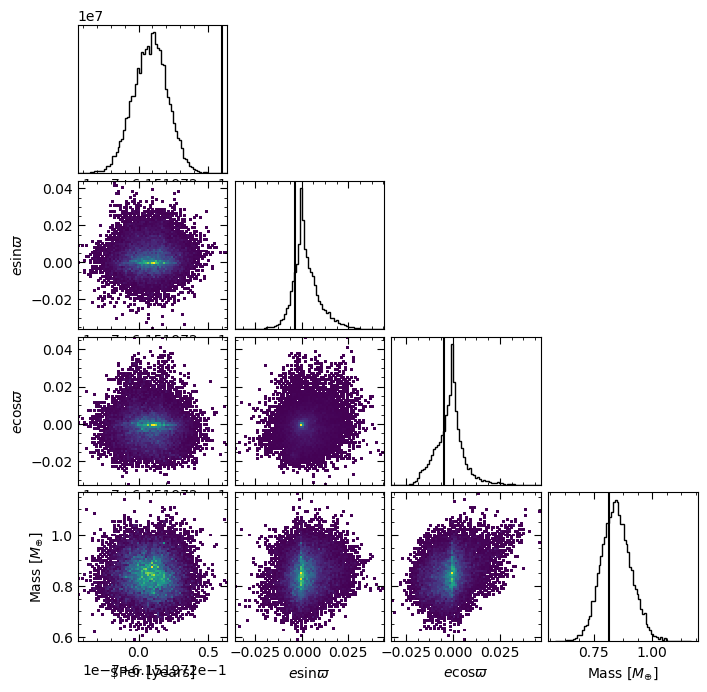

Simulated with σ= 30 seconds
P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [12]:
corner_planet(p_mc33,30,75,"venus")

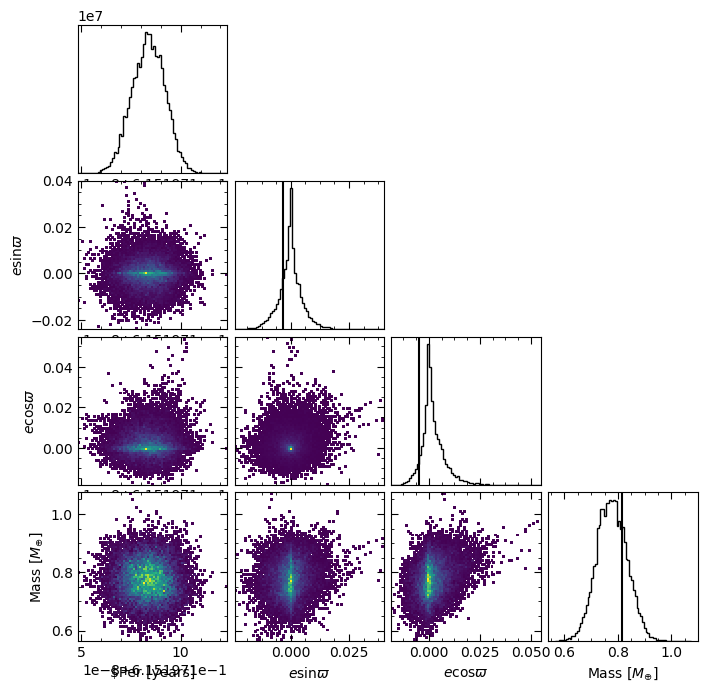

Simulated with σ= 30 seconds
P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [13]:
corner_planet(p_mc34,30,75,"venus")

In [26]:
p_mc31["par_mcmc"][:,:,12]

50×100000 Array{Float64,2}:
 4835.71  4835.71  4835.7   4835.65  …   9749.83         9749.83      
 4835.54  4835.54  4835.54  4835.54         2.30883e13      2.30883e13
 4835.59  4835.59  4835.59  4835.59      6685.64         6685.64      
 4835.65  4835.63  4835.66  4835.66         3.68133e14      3.68133e14
 4835.52  4835.52  4835.52  4835.52      4530.51         4530.51      
 4835.59  4835.59  4835.68  4835.68  …      1.98486e13      1.98486e13
 4835.65  4835.65  4835.67  4835.67      9646.63         9646.63      
 4835.52  4835.52  4835.52  4835.52         4.76514e14      4.76514e14
 4835.54  4835.54  4835.55  4835.55     29956.6         29956.6       
 4835.71  4835.71  4835.68  4835.68         3.01998e14      3.01998e14
 4835.75  4835.75  4835.75  4835.75  …   7286.19         7286.19      
 4835.54  4835.62  4835.62  4835.62      9361.89         9361.89      
 4835.74  4835.74  4835.72  4835.74         1.50588e14      1.50588e14
    ⋮                                ⋱           

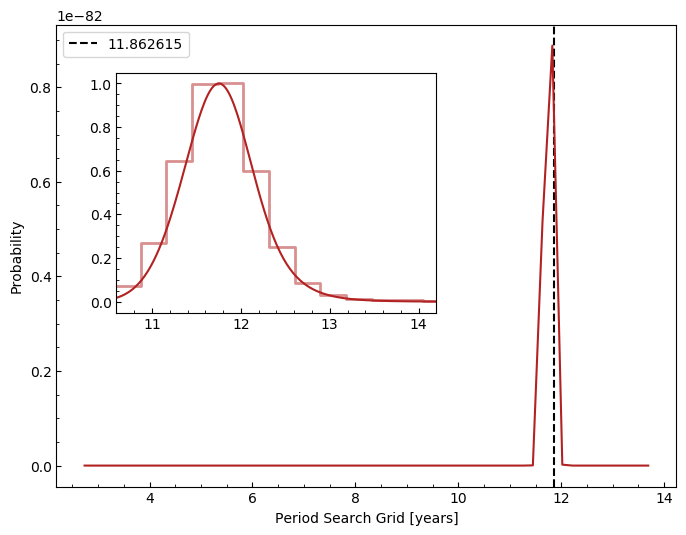

In [72]:
include("plot_likelihood.jl")
plot_likelihood(p_315,p_mc315,false)

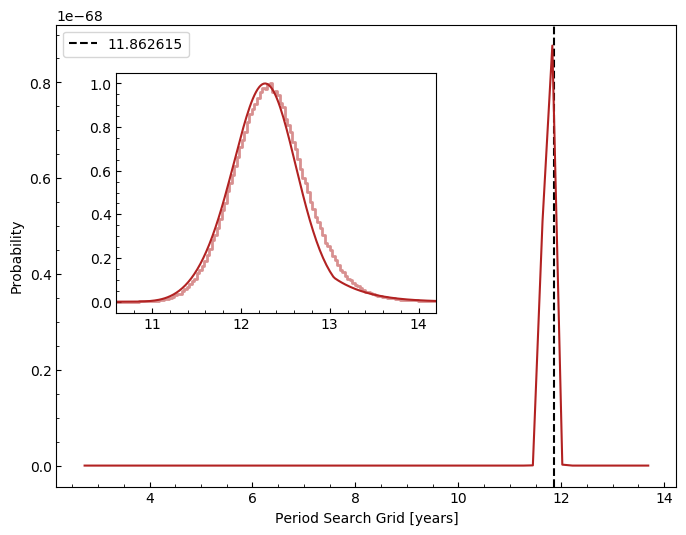

In [8]:
plot_likelihood(p_32,p_mc32,false)

In [56]:
p_315["pbest_global"]

15-element Array{Float64,1}:
    2.4844128946587768e-6
  224.70078620967718     
    2.4335037652676497e6 
    0.0003960501578125244
    0.023574736248352147 
    2.900845290869312e-6 
  365.2564552111353      
    2.4336244022541298e6 
    0.013916597285104354 
    0.02083847541610946  
   -0.0011527590983098717
 4247.176412201281       
    2.4380618510025768e6 
    0.08230518976648737  
    0.07542431043837321  

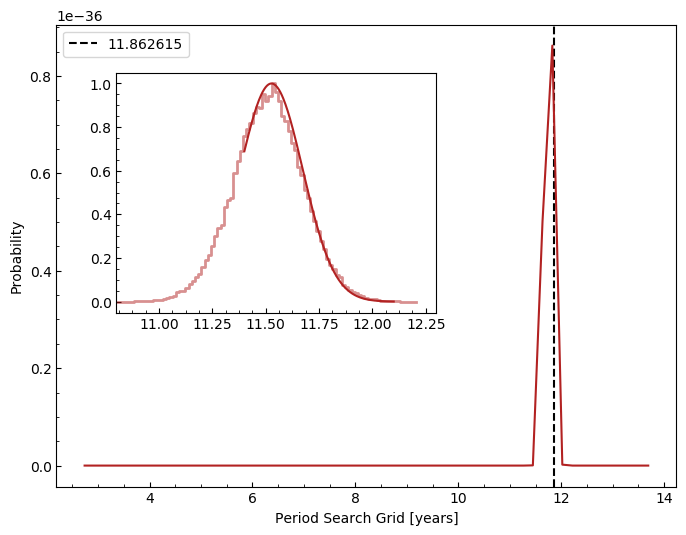

In [61]:
include("plot_likelihood.jl")
plot_likelihood(p_33,p_mc33,false)

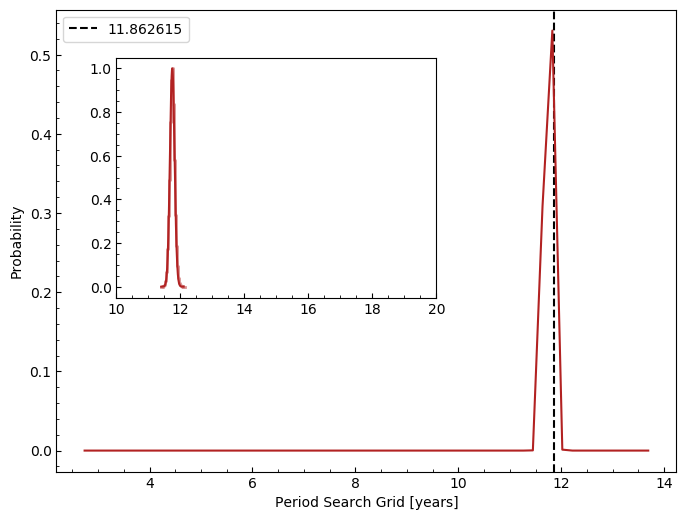

In [58]:
plot_likelihood(p_34,p_mc34,false)

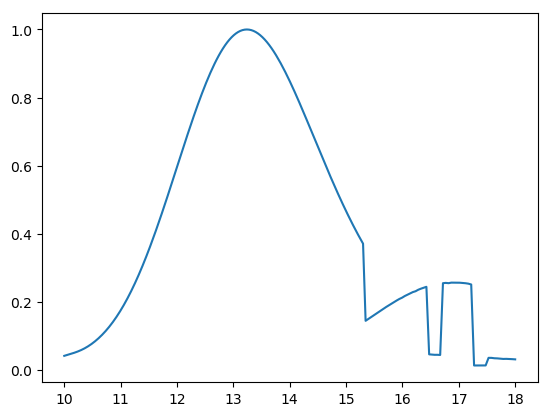

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17bbc7908>

In [15]:
wide = jldopen("FITS/p3_widefit30.0s40.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide["p3in"]),stop=log10(wide["p3out"]),length=wide["np3"])) /365.25
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_31["lprob_p3"])))
xgrid = (10 .^ range(log10(p_31["p3in"]),stop=log10(p_31["p3out"]),length=p_31["np3"])) /365.25
xprob = exp.((p_31["lprob_p3"] .-maximum(p_31["lprob_p3"])))

grid31 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob31 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]

plot(xgrid,xprob)

In [56]:
for i=1:length(xprob); println("Per= ",xgrid[i]," Likelihood= ",xprob[i]," with Prob= ",p_31["lprob_p3"][i]) end

Per= 10.000000000000004 Likelihood= 0.041364528713946865 with Prob= -42.89134614452699
Per= 10.029580683089712 Likelihood= 0.042837397537330124 with Prob= -42.85635836844513
Per= 10.059248867860616 Likelihood= 0.04430475987337475 with Prob= -42.82267774612036
Per= 10.089004813148685 Likelihood= 0.045780817935865616 with Prob= -42.789904682722536
Per= 10.118848778555504 Likelihood= 0.04728490023174588 with Prob= -42.75757885322036
Per= 10.148781024450617 Likelihood= 0.04883908202567263 with Prob= -42.725239010228364
Per= 10.17880181197373 Likelihood= 0.05047228600658568 with Prob= -42.69234547005998
Per= 10.208911403037014 Likelihood= 0.05221140743790304 with Prob= -42.65846885944425
Per= 10.239110060327427 Likelihood= 0.054088172438681026 with Prob= -42.62315432585432
Per= 10.269398047308936 Likelihood= 0.05612712249029145 with Prob= -42.58615070120476
Per= 10.299775628224888 Likelihood= 0.058350727921595506 with Prob= -42.54729803000472
Per= 10.33024306810025 Likelihood= 0.06077502621

Per= 13.716934840309252 Likelihood= 0.9351832390199113 with Prob= -39.773027376102085
Per= 13.75751047055659 Likelihood= 0.9244684741530764 with Prob= -39.78455091393467
Per= 13.798206126289863 Likelihood= 0.913070084691917 with Prob= -39.79695722302238
Per= 13.839022162552686 Likelihood= 0.9010181656274091 with Prob= -39.81024444471734
Per= 13.879958935438864 Likelihood= 0.8883525000432145 with Prob= -39.82440124001837
Per= 13.921016802095604 Likelihood= 0.8751108212897464 with Prob= -39.8394193325107
Per= 13.962196120726533 Likelihood= 0.861332719165834 with Prob= -39.855289000559715
Per= 14.003497250594874 Likelihood= 0.8470543464673245 with Prob= -39.87200500767769
Per= 14.04492055202662 Likelihood= 0.8323199945086786 with Prob= -39.8895528880884
Per= 14.086466386413582 Likelihood= 0.8171695240904577 with Prob= -39.907923294588606
Per= 14.128135116216601 Likelihood= 0.8016415315185574 with Prob= -39.92710832398597
Per= 14.169927104968739 Likelihood= 0.7857817533552331 with Prob= -3

In [24]:
for i=1:p_mc315["nwalkers"] println(minimum(p_mc315["lprob_mcmc"][i,:])) end

275.77402357875116
215.80394070118177
-64.18847350522441
278.6903130577634
170.5223762481683
261.5004216586847
243.23371971626784
174.14868180813858
222.14788706444136
232.50326980095144
277.63477257839253
135.47559524726225
267.3298179510078
231.13901004927052
60.6884441822983
239.01238972974153
62.68507916965354
277.6243376948164
21.307019815358068
118.63925867891527
275.95874798500637
255.49939239046586
-12.518613135123005
100.609272140786
275.10906344023675
223.14287958073626
193.63144894523992
274.4677863130825
273.48096514179144
259.64140837219617
276.1828036123073
256.6977029927742
261.03796891124875
96.87487753797794
265.803516530288
278.41120144061
175.09791598212084
279.0822706036264
278.47479962176425
149.2953552627456
260.99577857455836
140.6143475343347
270.47241628139824
263.93391535268853
266.54133833606153
259.54702808505357
188.19574547135244
277.4983635787672
276.16910742579654
170.06373133892046


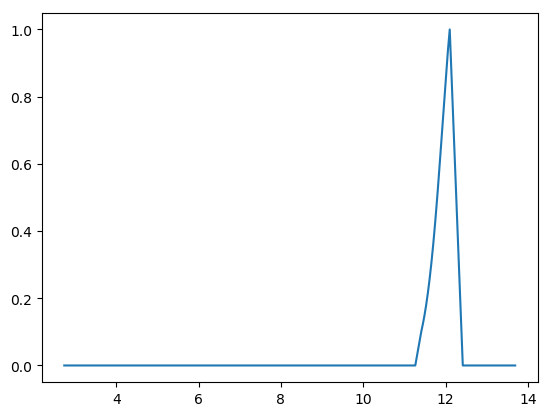

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1675c5f28>

In [178]:
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_32["lprob_p3"])))
xgrid = (10 .^ range(log10(p_32["p3in"]),stop=log10(p_32["p3out"]),length=p_32["np3"])) /365.25
xprob = exp.((p_32["lprob_p3"] .-maximum(p_32["lprob_p3"])))

grid32 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob32 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid32,prob32)

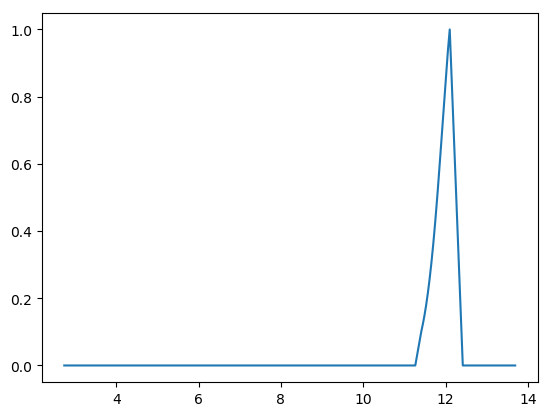

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16a17afd0>

In [179]:
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_33["lprob_p3"])))
xgrid = (10 .^ range(log10(p_33["p3in"]),stop=log10(p_33["p3out"]),length=p_33["np3"])) /365.25
xprob = exp.((p_33["lprob_p3"] .-maximum(p_33["lprob_p3"])))

grid33 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob33 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid33,prob33)

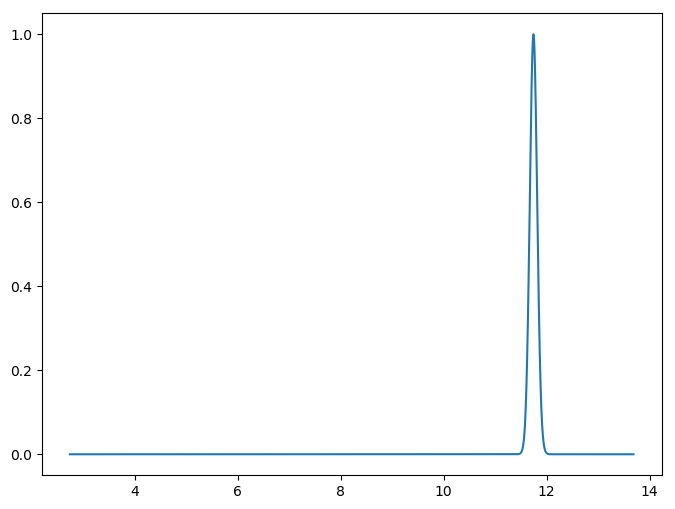

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x169f23978>

In [176]:
wide = jldopen("FITS/p3_widefit30.0s40.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide["p3in"]),stop=log10(wide["p3out"]),length=wide["np3"])) /365.25
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_34["lprob_p3"])))
xgrid = (10 .^ range(log10(p_34["p3in"]),stop=log10(p_34["p3out"]),length=p_34["np3"])) /365.25
xprob = exp.((p_34["lprob_p3"] .-maximum(p_34["lprob_p3"])))
;
fig = plt.figure(figsize=(8,6))
grid34 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob34 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid34,prob34)
# plot(,xprob)
# plot(,lprob_wide[1:end-12])
# plot(,lprob_wide[end-7:end])

In [186]:
grid_wide[end-12]
# minimum(xgrid)

11.263053391190061

In [116]:
con = [grid_wide;xgrid]
cat = [lprob_wide;xprob]
v = sortperm(con)
con_perm = con[v]
cat_perm = cat[v]

300-element Array{Float64,1}:
 7.568162442633809e-129 
 2.4266294150703526e-127
 3.612584071163413e-138 
 3.3504721283049323e-137
 5.3301012221010373e-138
 2.08999913896937e-137  
 2.296398917962244e-137 
 8.445858493508291e-138 
 3.693136654587856e-138 
 7.7089662774492885e-137
 7.885885213988926e-137 
 3.2921592747265396e-121
 8.227548126878545e-132 
 ⋮                      
 0.9914256848532541     
 0.9942859298483251     
 0.9971447986585075     
 1.0                    
 3.718057159171616e-106 
 1.98407681407841e-111  
 1.7663622768847427e-116
 6.613808908088376e-121 
 1.2597206791710992e-124
 1.0877975522911468e-127
 4.139077556215603e-130 
 3.9872155658773114e-132

In [98]:
grid = zeros(1)
prob = zeros(1)
for val=1:length(con)
    if con[val] > maximum(xgrid)
#         println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
    if con[val] < minimum(xgrid)
        #println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
#     if grid_wide[val] > minimum(xgrid) && grid_wide[val]< maximum(xgrid)
#         append!(grid,xgrid[val])
#     end
end

BoundsError: [91mBoundsError: attempt to access 100-element Array{Float64,1} at index [101][39m

In [128]:
minimum(xgrid)

11.399863107460641

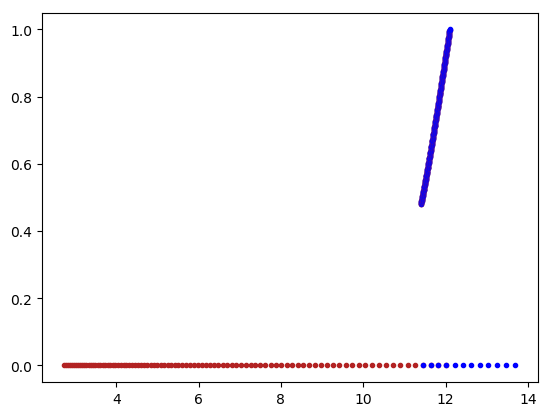

In [126]:
for i=1:length(con_perm)
    if con_perm[i] < maximum(xgrid)
        plot(con_perm[i],cat_perm[i],".",color="firebrick")
    end
    if con_perm[i] > minimum(xgrid)
        plot(con_perm[i],cat_perm[i],".",color="blue")
    end
end

In [161]:
avg(grid_wide[end-12],xgrid[1])
avg(lprob_wide[end-12],xprob[1])

1.0275934718109768e-5

In [158]:
avg(x,y) = (x + y)/2

avg (generic function with 1 method)

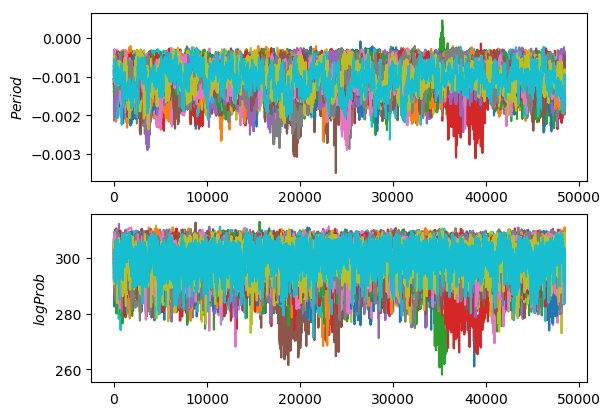

In [73]:
include("plot_emcee.jl")
plot_trace(p_mc315)
# xlim(-1,10)

In [52]:
mask = p_mc315["lprob_mcmc"][:,iburn:nsteps] .> 275
newp3 = p_mc315["par_mcmc"][:,iburn:nsteps,12][mask]


2400620-element Array{Float64,1}:
 4330.033550619669 
 4388.327009563516 
 4147.534669213267 
 4337.057893348042 
 4257.80633866397  
 4128.016159041143 
 4462.38846198964  
 4261.588801457117 
 4182.364428990798 
 4278.497838694287 
 4344.397015495233 
 4420.967546071569 
 4379.651257437181 
    ⋮              
 4311.571196559383 
 4255.349006178421 
 4217.861807102928 
 4429.409091229388 
 4290.971862374748 
 4299.213050268951 
 4085.920054738229 
 4387.6396566722315
 4437.838726385843 
 4083.5388967995473
 4260.7467094514195
 4371.086354451035 

In [49]:
mask = p_mc315["lprob_mcmc"].> 275
for i=1:nwalkers 
    for j=iburn:nsteps
        if p_mc315["lprob_mcmc"][i,j]<275 
            println(p_mc315["par_mcmc"][i,j,12])
        end 
    end
end


5351.695549630866
5351.695549630866
4526.580386856297
4526.580386856297
9721.09316006962
10108.985189865158
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
11667.011365847133
11667.011365847133
11005.674029231306
11005.674029231306
11005.674029231306
11005.674029231306
11479.03534781344
11479.03534781344
11479.03534781344
11479.03534781344
11479.03534781344
11145.441739472977
11145.441739472977
11619.850528173978
11619.850528173978
11619.850528173978
10172.868636110892
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
10654.113721187217
10654.113721187217
10654.113721187217
11629.909394725908
11629.909394725908
11016.522406833032
11016.522406833032
11016.522406833032
11016.522406833032
10347.347049418227
10347.347049418227
10347.347049418227
10347.347049418227
10347.347049418227
11814.761804152598
11814.761804152598
10997.665116061075
10997.66511606107

9637.252766174524
9990.544570483795
9990.544570483795
9990.544570483795
10944.803365824291
11300.643653448351
11300.643653448351
11300.643653448351
9955.771625033234
9955.771625033234
9180.752905479667
9180.752905479667
9180.752905479667
9379.330069260015
9300.211644462725
7933.202528153799
8243.46943503874
8505.246019272681
12993.712345031101
13044.431622710987
11930.91438176385
11930.91438176385
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
10496.693034831625
10496.693034831625
10496.693034831625
10496.693034831625
10808.201875280933
10856.106082519895
10856.106082519895
12292.153851903247
12292.153851903247
10577.434581945037
10577.434581945037
10581.26595047328
11402.520607801665
11402.520607801665
11402.520607801665
11023.918542792348
10968.920487784051
10968.920487784051
10968.920487784051
10468.471805515925
12065.974865018312
12065.974865018312
12045.898937267468
12045.898937267468
12045.898937267468
11217.06166

11519.621172792975
11519.621172792975
11335.454958577
11703.39724329363
11703.39724329363
12373.296455737831
12373.296455737831
12373.296455737831
12373.296455737831
10653.90700401695
10653.90700401695
10653.90700401695
12020.836202841605
12020.836202841605
12020.836202841605
14785.694914987866
14785.694914987866
14785.694914987866
12168.74595103326
11374.702070490584
15720.496985786236
12619.004910194568
12619.004910194568
12013.588567596462
11375.351626027908
11375.351626027908
14281.906769700181
14281.906769700181
13313.395630961044
14164.178673484907
13950.249174196462
12356.682201131927
11653.082657968223
11653.082657968223
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
10878.387680678034
10878.387680678034
10878.387680678034
10663.57390360954
10898.011837803799
11049.727935529138
10651.08662322011
11460.362943723268
10995.908533149352
10995.908533149352
10995.908533149352
11453.702700314869
11453.702700314869
1145

4753.09972764222
4753.09972764222
4753.09972764222


In [17]:
par_315 = p_mc315["par_mcmc"]
lprob_315 = p_mc315["lprob_mcmc"]
nwalkers = p_mc315["nwalkers"]
nsteps = p_mc315["nsteps"]
accept = p_mc315["accept"]
iburn = p_mc315["iburn"]
m = zeros(0)
for j=1:nwalkers 
    append!(m,mean(par_315[j,1:nsteps,12]))
end

50-element Array{Float64,1}:
 4272.411128366043 
 4264.960199667075 
 4322.248869588698 
 4312.136820102708 
 4264.702735417306 
 4903.035232310867 
 4450.121145496737 
 4306.364748046698 
 4277.5413514009615
 4287.013340801211 
 4298.62066656539  
 4341.22625077068  
 4282.260777666159 
    ⋮              
 4287.783579697407 
 4271.442947975939 
 4354.091028510012 
 4285.730867134766 
 4304.541623943882 
 4571.721723267384 
 4276.329846764163 
 4292.9304760547375
 4328.427360526723 
 4291.250853446582 
 4282.504573210798 
 4307.40233663476  

In [63]:
p_315["pbest_global"]
#p_mc315["par_mcmc"][:,iburn:nsteps,11]

15-element Array{Float64,1}:
    2.4844128946587768e-6
  224.70078620967718     
    2.4335037652676497e6 
    0.0003960501578125244
    0.023574736248352147 
    2.900845290869312e-6 
  365.2564552111353      
    2.4336244022541298e6 
    0.013916597285104354 
    0.02083847541610946  
   -0.0011527590983098717
 4247.176412201281       
    2.4380618510025768e6 
    0.08230518976648737  
    0.07542431043837321  

In [32]:
minimum(m)

365.2561427755755

In [38]:
minimum(vec(par_31[1:end,1:nsteps,7]))

365.2546224716408

In [42]:
# m_31=jldopen("FITS/moon_fit30.0s10.0yrs.jld2");m_mc31 = jldopen("MCMC/moon_mcmc30.0s10.0yrs.jld2");
m_32=jldopen("FITS/moon_fit60.0s20.0yrs.jld2");m_mc32 = jldopen("MCMC/moon_mcmc60.0s20.0yrs.jld2");
m_33=jldopen("FITS/moon_fit60.0s30.0yrs.jld2");m_mc33 = jldopen("MCMC/moon_mcmc60.0s30.0yrs.jld2");
m_34=jldopen("FITS/moon_fit60.0s40.0yrs.jld2");m_mc34 = jldopen("MCMC/moon_mcmc60.0s40.0yrs.jld2");

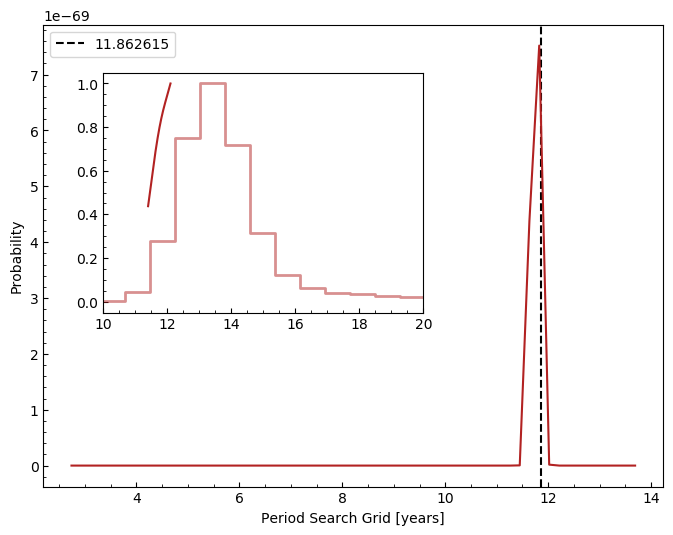

In [49]:
include("plot_likelihood.jl")
plot_likelihood(m_32,m_mc32,false)

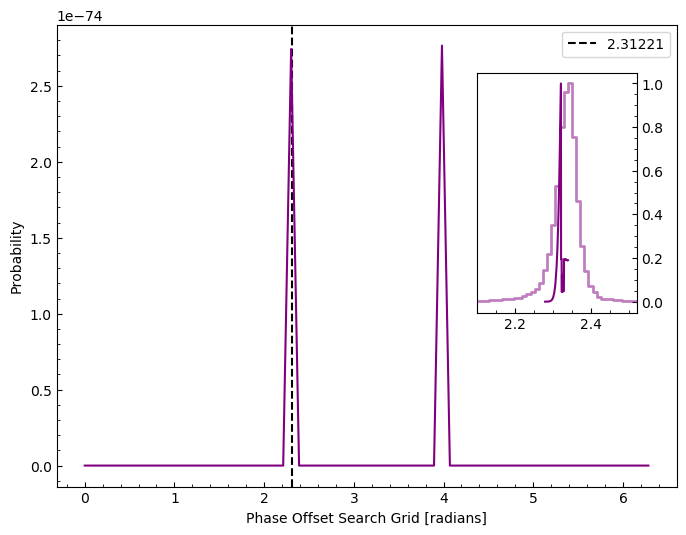

In [70]:
include("plot_likelihood.jl")
plot_likelihood(m_32,m_mc32,true)

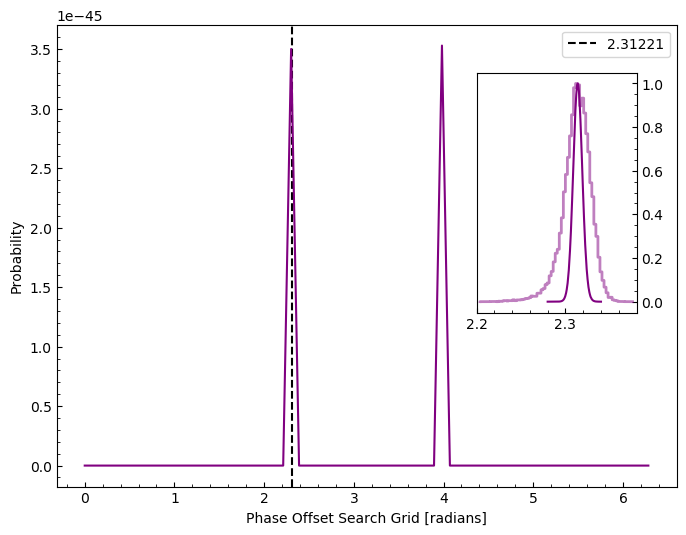

In [72]:
include("plot_likelihood.jl")
plot_likelihood(m_33,m_mc33,true)

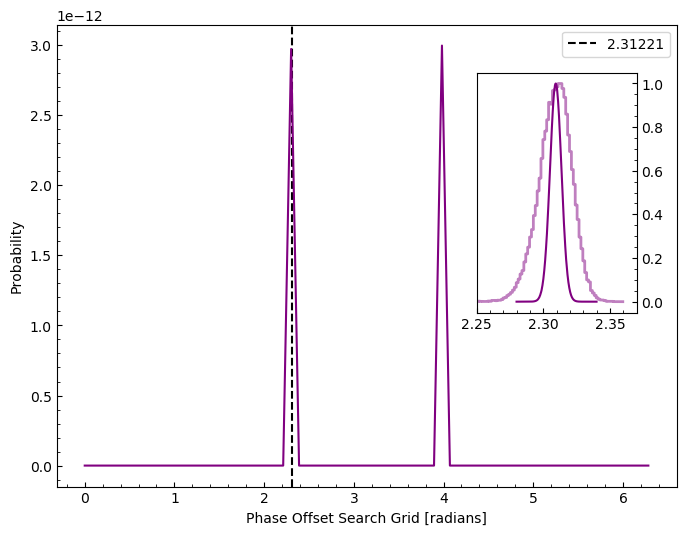

In [64]:
include("plot_likelihood.jl")
plot_likelihood(m_34,m_mc34,true)

In [20]:
# p_mc315["par_mcmc"]
minimum(vec(p_mc315["lprob_mcmc"]))
# for i=1:length(p_mc315["lprob_mcmc"])
# #     if p_mc315["lprob_mcmc"][i]<0
#         print(p_mc315["par_mcmc"][i,:,:])
# #     end
# end

-64.18847350522441

In [ ]:
p_31["lprob"]